# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [178]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats

from geopy.geocoders import Nominatim

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [9]:
# Pull 2 months data
datestring = '201501'
datestring2 = '201502'

getCitiBikeCSV(datestring)
getCitiBikeCSV(datestring2)

('Downloading', '201501')
file in place, you can continue
('Downloading', '201502')
file in place, you can continue


In [10]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df.head()
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [11]:
# Join 2 months data
CitiBikedf = pd.concat([df,df2]).reset_index();

In [12]:
# df is the dataframe where the content of the csv file is stored
CitiBikedf['date'] = pd.to_datetime(CitiBikedf['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
CitiBikedf.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [13]:
CitiBikedf.columns

Index([u'index', u'tripduration', u'starttime', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [14]:
CitiBikedf

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00
5,5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2,2015-01-01 00:07:00
6,6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1,2015-01-01 00:07:00
7,7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2,2015-01-01 00:08:00
8,8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1,2015-01-01 00:09:00
9,9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1,2015-01-01 00:10:00


# SPLIT BY CATEGORY FOR DAY AND NIGHT

Day time is defined as 07:00 to 19:00 and night time is defined as 19:00 to 07:00 

**H0: there is significant no statistical difference in the trip duration distribution of night and day riders**
$$ \alpha = 0.05 $$

In [23]:
#################################################################################
CitiBikedf['DayDur'] = CitiBikedf['tripduration'][(CitiBikedf['date'].dt.hour >= 7) & (CitiBikedf['date'].dt.hour < 19)]
CitiBikedf['NightDur'] = CitiBikedf['tripduration'][(CitiBikedf['date'].dt.hour < 7) | (CitiBikedf['date'].dt.hour >= 19)]

CitiBikedf.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,DayDur,NightDur
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,1346.0
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,NaN,363.0
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,NaN,346.0
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,NaN,182.0
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,NaN,969.0


In [24]:
CitiBikedf.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,index,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,DayDur,NightDur
count,482482.000000,482482.000000,482482.000000,482482.000000,482482.000000,482482.000000,482482.000000,482482.000000,482482.000000,474587.000000,482482.000000,376188.000000,106294.000000
mean,124689.508751,652.308302,441.549283,40.735796,-73.990135,439.604149,40.735575,-73.990395,18136.157193,1975.089488,1.159921,661.405723,620.111370
std,76255.831588,889.638886,328.039689,0.018690,0.011617,324.216576,0.018621,0.011647,2069.279954,11.641436,0.409268,826.451769,1083.467793
min,0.000000,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,60.000000,60.000000
25%,60310.000000,337.000000,308.000000,40.723627,-73.998004,307.000000,40.723180,-73.998512,16349.000000,NaN,1.000000,NaN,NaN
50%,120620.000000,505.000000,417.000000,40.738177,-73.990093,417.000000,40.737815,-73.990617,18127.000000,NaN,1.000000,NaN,NaN
75%,180930.000000,769.000000,492.000000,40.750450,-73.981854,491.000000,40.750200,-73.981918,19896.000000,NaN,1.000000,NaN,NaN
max,285551.000000,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21703.000000,1999.000000,2.000000,43023.000000,43016.000000


In [35]:
CitiBikedf['NightDur'].max(axis=0)

43016.0

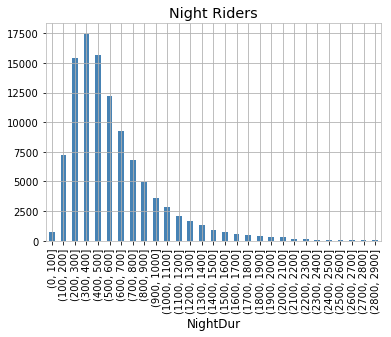

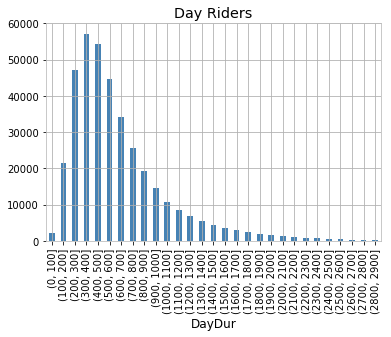

In [48]:

bins = np.arange(0,3000,3000/30)
axNightDur = CitiBikedf.NightDur.groupby(pd.cut(CitiBikedf.NightDur, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axNightDur.set_title("Night Riders")

axDayDur = CitiBikedf.DayDur.groupby(pd.cut(CitiBikedf.DayDur, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axDayDur.set_title("Day Riders")




**Figure 1: histogrammed distribution of trip duration by day and night **
The histograms are almost identical, although the are drastically less night riders than day riders. 

              count_nonzero
DayDur                     
(0, 100]           0.001162
(100, 200]         0.012541
(200, 300]         0.032050
(300, 400]         0.044149
(400, 500]         0.047544
(500, 600]         0.043278
(600, 700]         0.038994
(700, 800]         0.034898
(800, 900]         0.030307
(900, 1000]        0.026019
(1000, 1100]       0.024151
(1100, 1200]       0.021231
(1200, 1300]       0.019227
(1300, 1400]       0.017136
(1400, 1500]       0.014126
(1500, 1600]       0.011400
(1600, 1700]       0.009395
(1700, 1800]       0.007452
(1800, 1900]       0.006251
(1900, 2000]       0.005444
(2000, 2100]       0.004744
(2100, 2200]       0.003804
(2200, 2300]       0.002922
(2300, 2400]       0.002170
(2400, 2500]       0.001348
(2500, 2600]       0.000715
(2600, 2700]       0.000422
(2700, 2800]       0.000183
(2800, 2900]       0.000000


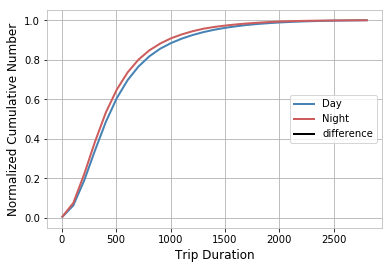

In [54]:
#print df.ageS, df.ageS.cumsum()

csNightDur = CitiBikedf.NightDur.groupby(pd.cut(CitiBikedf.NightDur, bins)).agg([count_nonzero]).cumsum()

csDayDur = CitiBikedf.DayDur.groupby(pd.cut(CitiBikedf.DayDur, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csDayDur / csDayDur.max()-csNightDur / csNightDur.max()))

pl.plot(bins[:-1] + 5, csDayDur / csDayDur.max(), label = "Day")
pl.plot(bins[:-1] + 5, csNightDur / csNightDur.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csDayDur / csDayDur.max() - csNightDur / csNightDur.max())**2, 'k-',label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' trip durations by Day/Night** <p>
The data sets are almost identical with no difference curve being plot because the differences are near negligible. 

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [53]:
ks = scipy.stats.ks_2samp(CitiBikedf.NightDur[~np.isnan(CitiBikedf.NightDur)], CitiBikedf.DayDur[~np.isnan(CitiBikedf.DayDur)])
print (ks)

Ks_2sampResult(statistic=0.04999652033782632, pvalue=1.6256981532056733e-180)


Although the cumulative distribution curves appear are almost identical. The p-value is very low, indicating that we cannot reject the null hypothesis. 

The statistic is still at a significant value with the largest difference being approximately 5%


# Pearson's  test for correlation
Alex Shannon assisted me with some code for this



In [65]:
CitiBikedf.NightDur.dropna(inplace= True)
CitiBikedf.DayDur.dropna(inplace= True)

if len(CitiBikedf.DayDur) < len(CitiBikedf.NightDur):
    length = len(CitiBikedf.DayDur)
else:
    length = len(CitiBikedf.NightDur)
    
np.random.seed(100)
pearson_trip_NightDur = np.sort(np.random.choice(CitiBikedf.NightDur, length, replace=False))
pearson_trip_DayDur = np.sort(np.random.choice(CitiBikedf.DayDur, length, replace=False))

pearson = scipy.stats.pearsonr(pearson_trip_NightDur,pearson_trip_DayDur)
print(pearson)

(0.95824499288207277, 0.0)


There is an almost 1 value for x correlation, indicating a strong correlation, however there is no correlation between the y values, with a y correlation of 0. 

# Spearman's  test for correlation
Alex Shannon assisted me with some code for this


In [62]:
spearman = scipy.stats.spearmanr(pearson_trip_NightDur, pearson_trip_DayDur)
print(spearman)

SpearmanrResult(correlation=0.0053988046247259759, pvalue=0.07838212704204324)


The Spearman test has a p-value greater than 0.05, indicating that we may reject the null hypothesis. However, there is almost no correlation with a correlation value that is almost 0

# SPLIT BY CATEGORY AGE AND FOR RIDERS FROM MANHATTAN AND BROOKLYN

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [140]:
UniqueCoords =  CitiBikedf.drop([ 'tripduration', 'starttime', 'stoptime','start station id', 'start station name', 'end station id', 'end station name','end station latitude', 'end station longitude', 'bikeid','usertype', 'birth year', 'gender', 'date', 'DayDur', 'NightDur','Borough'],axis=1)
UniqueCoords = UniqueCoords.drop_duplicates(['start station longitude', 'start station latitude']).reset_index()
UniqueCoords.head()

,level_0,index,start station latitude,start station longitude
0,0,0,40.750020,-73.969053
1,1,1,40.743174,-74.003664
2,2,2,40.740964,-73.986022
3,3,3,40.683178,-73.965964
4,4,4,40.745168,-73.986831
5,5,5,40.750073,-73.998393
6,6,6,40.748549,-73.988084
7,7,7,40.739323,-74.008119
8,8,8,40.762272,-73.987882
9,9,9,40.748238,-73.978311


If Geocoder fails run again. Sometimes disconnects

In [182]:

geolocator = Nominatim()

UniqueCoords['Borough'] = np.nan


for i in range(UniqueCoords.shape[0]):
    
    address = geolocator.reverse(str(UniqueCoords['start station latitude'][i]) + ", " + str(UniqueCoords['start station longitude'][i])) 
    temp = str(address).split(',')

    if np.in1d(" New York County", temp):
        
        UniqueCoords['Borough'][i] = 'Manhattan'
        
    if np.in1d(" Kings County", temp):       
   
        UniqueCoords['Borough'][i] = 'Brooklyn'   
        

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [195]:
UniqueCoords =  UniqueCoords.drop(['index', 'level_0'],axis=1)
CitiBikedf = pd.merge(CitiBikedf, UniqueCoords, on=['start station latitude','start station longitude'], how='outer')
CitiBikedf.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,DayDur,NightDur,Borough
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.75002,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,1346.0,Manhattan
1,1277,845,1/1/2015 11:42,1/1/2015 11:56,455,1 Ave & E 44 St,40.75002,-73.969053,447,8 Ave & W 52 St,40.763707,-73.985162,14978,Customer,NaN,0,2015-01-01 11:42:00,845.0,NaN,Manhattan
2,2506,634,1/1/2015 14:49,1/1/2015 14:59,455,1 Ave & E 44 St,40.75002,-73.969053,492,W 33 St & 7 Ave,40.750200,-73.990931,20064,Subscriber,1960.0,1,2015-01-01 14:49:00,634.0,NaN,Manhattan
3,3882,210,1/1/2015 17:34,1/1/2015 17:37,455,1 Ave & E 44 St,40.75002,-73.969053,164,E 47 St & 2 Ave,40.753231,-73.970325,20538,Subscriber,1968.0,1,2015-01-01 17:34:00,210.0,NaN,Manhattan
4,3884,1270,1/1/2015 17:35,1/1/2015 17:56,455,1 Ave & E 44 St,40.75002,-73.969053,2006,Central Park S & 6 Ave,40.765909,-73.976342,17861,Subscriber,1983.0,1,2015-01-01 17:35:00,1270.0,NaN,Manhattan


In [196]:
CitiBikedf['age'] = 2015 - CitiBikedf['birth year']

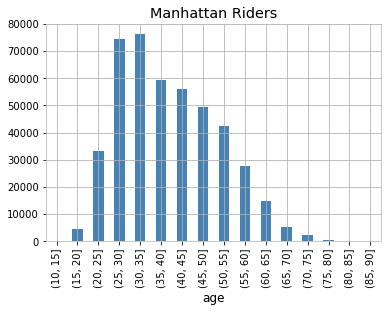

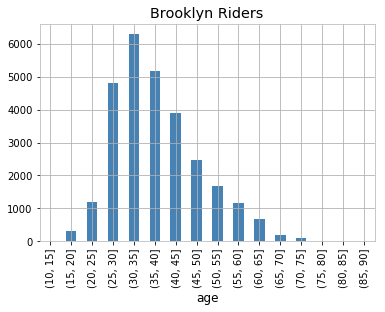

In [215]:
binss = np.arange(10,95,5)

ManhattanTemp = CitiBikedf[CitiBikedf['Borough'] == "Manhattan"]
Manhattan = ManhattanTemp['age'].groupby(pd.cut(ManhattanTemp.age, binss)).agg([count_nonzero]).plot(kind='bar', legend=False)
Manhattan.set_title("Manhattan Riders")


BrooklynTemp = CitiBikedf[CitiBikedf['Borough'] == "Brooklyn"]
Brooklyn = BrooklynTemp['age'].groupby(pd.cut(BrooklynTemp.age, binss)).agg([count_nonzero]).plot(kind='bar', legend=False)
Brooklyn.set_title("Brooklyn Riders")

          count_nonzero
age                    
(10, 15]       0.000000
(15, 20]       0.001463
(20, 25]       0.030797
(25, 30]       0.025499
(30, 35]       0.028433
(35, 40]       0.080451
(40, 45]       0.094044
(45, 50]       0.071948
(50, 55]       0.036766
(55, 60]       0.016463
(60, 65]       0.006703
(65, 70]       0.002304
(70, 75]       0.000743
(75, 80]       0.000258
(80, 85]       0.000020
(85, 90]       0.000000


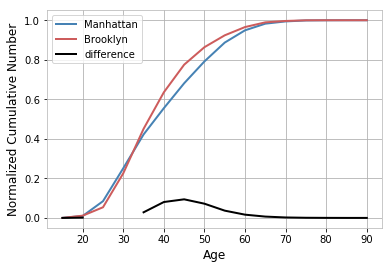

In [217]:

csMN=ManhattanTemp['age'].groupby(pd.cut(ManhattanTemp.age, binss)).agg([count_nonzero]).cumsum()

csBK=BrooklynTemp['age'].groupby(pd.cut(BrooklynTemp.age, binss)).agg([count_nonzero]).cumsum()

print (np.abs(csMN / csMN.max()-csBK / csBK.max()))

pl.plot(binss[:-1] + 5, csMN / csMN.max(), label = "Manhattan")
pl.plot(binss[:-1] + 5, csBK / csBK.max(), label = "Brooklyn")
pl.plot(binss[:-1] + 5, np.sqrt(csBK / csBK.max() - csMN / csMN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# KS tests to compare 2 samples


In [219]:
ks = scipy.stats.ks_2samp(ManhattanTemp['age'][~np.isnan(ManhattanTemp['age'])], BrooklynTemp['age'][~np.isnan(BrooklynTemp['age'])])
print (ks)


Ks_2sampResult(statistic=0.1206755325994617, pvalue=0.0)


The biggest point between the two cumulative distribution curves is 12% highlighting a big gap between the two. 

The p-value is 0 so we reject the hypothesis that the data sets are the same. Which upon obervation makes sense, particularly looking at the difference curve.


# Pearson's  test for correlation
Alex Shannon assisted me with some code for this



In [220]:
ManhattanTemp['age'].dropna(inplace= True)
BrooklynTemp['age'].dropna(inplace= True)

if len(BrooklynTemp['age']) < len(ManhattanTemp['age']):
    length = len(BrooklynTemp['age'])
else:
    length = len(ManhattanTemp['age'])
    
np.random.seed(100)
pearson_age_Manhattan = np.sort(np.random.choice(ManhattanTemp['age'], length, replace=False))
pearson_age_Brooklyn = np.sort(np.random.choice(BrooklynTemp['age'], length, replace=False))

pearson = scipy.stats.pearsonr(pearson_age_Manhattan,pearson_age_Brooklyn)
print(pearson)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


(0.9930771277526983, 0.0)


The correlation between the data sets is strong at 0.993. The two tailed hypothesis test to measure the null hypothesis is negligible (<0.05) so we reject the hypothesis. 

# Spearman's  test for correlation
Alex Shannon assisted me with some code for this


In [221]:
spearman = scipy.stats.spearmanr(pearson_age_Manhattan,pearson_age_Brooklyn)
print(spearman)

SpearmanrResult(correlation=0.99907344124706277, pvalue=0.0)


Again we see a strong correlation between the twodata sets, however the P-value is close to 0 so we reject the hypothesis. 